## Proyecto K_means

### Librerias


In [769]:
import pandas as pd
from sklearn import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc



In [770]:
data_k=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

In [771]:
data_k.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

In [772]:
data_k.shape

(20640, 9)

### Paso 1: Seleccionando variables de interes

In [773]:
cols=['Latitude','Longitude','MedInc']
data_kmeans=data_k[cols]
data_kmeans.head()

Latitude  Longitude  MedInc
0     37.88    -122.23  8.3252
1     37.86    -122.22  8.3014
2     37.85    -122.24  7.2574
3     37.85    -122.25  5.6431
4     37.85    -122.25  3.8462

In [774]:
data_kmeans.describe()

Latitude     Longitude        MedInc
count  20640.000000  20640.000000  20640.000000
mean      35.631861   -119.569704      3.870671
std        2.135952      2.003532      1.899822
min       32.540000   -124.350000      0.499900
25%       33.930000   -121.800000      2.563400
50%       34.260000   -118.490000      3.534800
75%       37.710000   -118.010000      4.743250
max       41.950000   -114.310000     15.000100

#### Escalado de la data

Existen varias razones por la cual decidí escalar la data:

- Diferentes escalas: Las variables pueden tener escalas muy diferentes, lo que puede afectar la distancia entre los puntos y, por lo tanto, el resultado del clustering. Por ejemplo, la latitud y longitud pueden tener valores entre -124.35 y 41.95, mientras que los ingresos medios pueden tener valores entre 0.5 y 15. Si no se escalan, el algoritmo puede dar más importancia a la variable con la escala más amplia.
- Distancia euclidiana: El algoritmo k-means utiliza la distancia euclidiana para calcular la similitud entre los puntos. Sin embargo, la distancia euclidiana no es invariante a la escala, lo que significa que la distancia entre dos puntos puede variar según la escala de las variables. Al escalar la data, se garantiza que la distancia euclidiana sea invariante a la escala.
- Mejora de la interpretación: Al escalar la data, es más fácil interpretar los resultados del clustering, ya que todas las variables están en la misma escala.

In [775]:
scaler=MinMaxScaler()
X_scal=pd.DataFrame(scaler.fit_transform(data_kmeans),columns=['Latitude', 'Longitude','MedInc'])
X_scal.head()

Latitude  Longitude    MedInc
0  0.567481   0.211155  0.539668
1  0.565356   0.212151  0.538027
2  0.564293   0.210159  0.466028
3  0.564293   0.209163  0.354699
4  0.564293   0.209163  0.230776

#### Dividir el conjunto de datos en train y test: X_train, X_test

In [776]:
X_train, X_test= train_test_split(X_scal, test_size = 0.2, random_state = 42, shuffle=True)

In [777]:
X_train.head()

Latitude  Longitude    MedInc
14196  0.018066   0.729084  0.190322
8267   0.130712   0.616534  0.228452
17445  0.225292   0.385458  0.252162
14265  0.015940   0.721116  0.099488
2271   0.450584   0.453187  0.210638

### Paso 2: Modelo K-Means con 6 clusters y generacion cluster para conjunto train

In [778]:
# Crear modelo k-Means
kmeans = KMeans(n_clusters=6, random_state=42)

# Entrenar modelo
kmeans.fit(X_train)

cluster_tr=kmeans.fit_predict(X_train)

# Guardo cada cluster asignado a cada registros del conjunto train
labels_train=kmeans.labels_

# Numero de clusters usado en el modelo para X_train
n_clusters_train=kmeans.n_clusters

# Valor de los centroides calculados para cada clusters y variable del conjunto X_train
centroides_train=kmeans.cluster_centers_

# Asignacion de los clusters calculados a cada registro del conjunto X_train en una nueva columna del DataFrame 
X_train['cluster']=cluster_tr

#stds_train = np.array([X_train[labels_train == i].std(axis=0) for i in range(n_clusters_train)])
#print(stds_train),print(n_clusters_train)

In [779]:
print(cluster_tr[:9])

[3 3 0 3 0 5 3 5 3]


In [780]:
print(labels_train[:9])

[3 3 0 3 0 5 3 5 3]


In [781]:
print(len(kmeans.labels_))

16512


In [782]:
X_train.head(9)

Latitude  Longitude    MedInc  cluster
14196  0.018066   0.729084  0.190322        3
8267   0.130712   0.616534  0.228452        3
17445  0.225292   0.385458  0.252162        0
14265  0.015940   0.721116  0.099488        3
2271   0.450584   0.453187  0.210638        0
17848  0.518597   0.248008  0.422256        5
6252   0.159405   0.635458  0.139260        3
9389   0.570670   0.181275  0.516496        5
6113   0.168969   0.642430  0.068971        3

In [783]:
X_train['MedInc'].describe()

count    16512.000000
mean         0.233159
std          0.131329
min          0.000000
25%          0.142536
50%          0.210059
75%          0.294705
max          1.000000
Name: MedInc, dtype: float64

#### Grafico Clusters conjunto X_train

In [784]:
# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(X_train, x='Longitude', y='Latitude', z='MedInc', color='cluster', 
                    color_discrete_map={i: f'cluster {i+1}' for i in range(6)})

# Show the plot
fig.show()

Observaciones. 
- En este gráfico 3D se observa claramente la asignación de los clusters a cada valor perteneciente al conjunto X_train. 
- Es importante destacar, como los cluster 1 (morado) y 5 (amarillo), pertenecen a punto cuyo valor de la variable MedInc (ingreso medio), estan por encima de 0.3. 
- El resto de los cluster en su mayoria tienen un MedInc por debajo de 0.3.
- Existen clusters como el 0 (azul) y el 2 (magenta), cuyas poblaciones tiene un MedInc entre 0 y 0.33, denotando que en esas ubicaciones las personas pueden pertenecer a un estrato social similar (medido desde el ingreso).
- Existen poblaciones que por su ubicacion, pueden tener distintos estratos sociales como las que se observan en los clusters 4 y 5 y los clusters 3 y 1.

In [785]:
X_train.head()

Latitude  Longitude    MedInc  cluster
14196  0.018066   0.729084  0.190322        3
8267   0.130712   0.616534  0.228452        3
17445  0.225292   0.385458  0.252162        0
14265  0.015940   0.721116  0.099488        3
2271   0.450584   0.453187  0.210638        0

### Paso 3: Prediciendo el conjunto de test

In [786]:
cluster_te=kmeans.predict(X_test)
labels_test=kmeans.labels_
n_clusters_test=kmeans.n_clusters
centroides_test=kmeans.cluster_centers_
X_test['cluster']=cluster_te
#stds_test = np.array([X_test[labels_test == i].std(axis=0) for i in range(n_clusters_test)])
#print(stds_test)

#### K optimizado segun metodo del codo

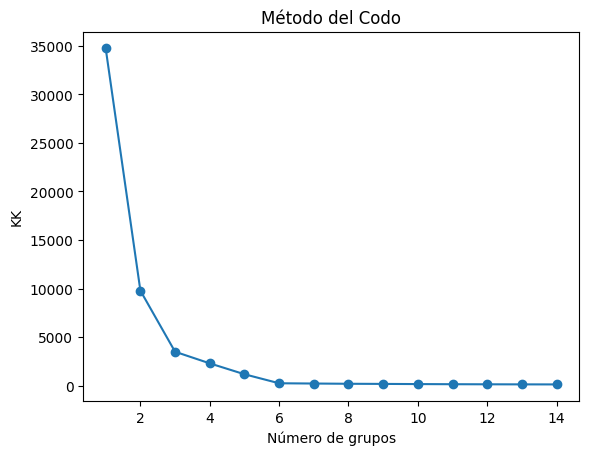

In [787]:
### Busqueda de El K

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

#### K optimizado segun Metodo Silhouette

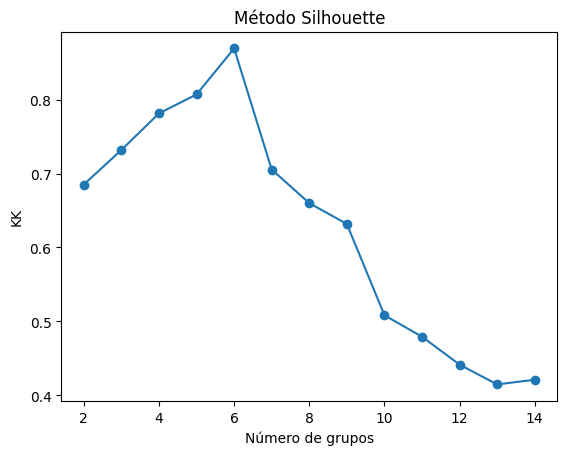

In [788]:
from sklearn.metrics import silhouette_score
from sklearn import metrics
silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)

    predict = kmeans.predict(X_train)
    silhouette_avg = metrics.silhouette_score(X_train, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método Silhouette')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

#### Comentarios sobre K

- Los dos métodos usados para encontrar el valor optimizado de K, arrojan el mismo resultado, se corrobora que el numero 6, es el mejor estimador del parámetro K.

#### Grafico Clusters conjunto X_test

In [789]:
# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(X_test, x='Longitude', y='Latitude', z='MedInc', color='cluster', 
                    color_discrete_map={i: f'cluster {i+1}' for i in range(6)})

# Show the plot
fig.show()

#### Grafico de ambos conjuntos el X_train y el X_test

In [790]:
# Concatena los conjuntos de datos train y test
data_X = pd.concat([X_train, X_test], axis=0, ignore_index=True)

# Crea una columna adicional para indicar si es train o test
data_X['dataset'] = ['train'] * len(X_train) + ['test'] * len(X_test)


# Crea un gráfico 3D con Plotly
fig = px.scatter_3d(data_X, x='Longitude', y='Latitude', z='MedInc', color='cluster', 
                    color_discrete_map={i: f'cluster {i+1}' for i in range(6)},
                    symbol='dataset', symbol_map={'train': 'circle', 'test': 'square-open'})

# Muestra el gráfico
fig.show()


Observaciones.
- El modelo aparentemente tiene un buen desempeño al momento de predecir los clusters de la data de evaluación (X_test).
- En la siguiente sección vamos a realizar una evaluación de la calidad del modelo a través de la técnica del matching.

In [791]:
data_X.groupby(['cluster'])['Longitude'].describe()

count      mean       std       min       25%       50%       75%  \
cluster                                                                       
0        1706.0  0.464450  0.058513  0.294821  0.433267  0.462649  0.505976   
1        3075.0  0.626593  0.058264  0.388446  0.592629  0.626494  0.656375   
2         881.0  0.191292  0.102454  0.000000  0.114542  0.202191  0.271912   
3        8039.0  0.648635  0.064264  0.484064  0.604582  0.626494  0.700199   
4        4985.0  0.254942  0.062485  0.109562  0.206175  0.240040  0.301793   
5        1954.0  0.232502  0.041159  0.117530  0.208167  0.230080  0.245020   

              max  
cluster            
0        0.730080  
1        0.892430  
2        0.425299  
3        1.000000  
4        0.489044  
5        0.464143

#### Evaluación de la calidad del matching. 

- Para evaluar la calidad del matching voy a utilizar una métrica de precisión, la cual estará dada por el porcentaje de clusters correctamente asignados al conjunto de evaluacion X_test, segun el modelo generado por X_train. Para tal efecto, se calculará la distancia euclidiana entre los centroides de cada clusters del modelo en X_train y los centroides de cada clusters obtenido para el conjunto X_test, y la almacenaré en una matriz denominada distancia. 

- Posteriormente, por cada fila (cada clusters de X_train ) en la matriz de distancia, tomaré el valor del clusters (conjunto X_test) correspondiente a la distancia minima.

- Por último, calcularé el porcentaje buscado, que sería la cantidad de aquellos clusters que hicieron match con el conjunto X_train dividido por la cantidad de clusters usado en el conjunto X_train.

In [792]:
import numpy as np
from scipy.spatial import distance

# Cálculo de la distancia entre clusters utilizando la distancia euclidiana
distancia = np.zeros((n_clusters_train, n_clusters_test))
for i in range(n_clusters_train):
    for j in range(n_clusters_test):
        distancia[i, j] = distance.euclidean(centroides_train[i], centroides_test[j])

# Asignación de correspondencias entre clusters
matches = np.argmin(distancia, axis=1)

# Evaluación de la calidad del matching
precision = np.sum(matches == np.arange(n_clusters_train)) / n_clusters_train
recall = np.sum(np.isin(matches, np.arange(n_clusters_train))) / n_clusters_test
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precisión:", precision)
print("Recobrado:", recall)
print("F1-score:", f1_score)

Precisión: 1.0
Recobrado: 1.0
F1-score: 1.0


In [793]:
print(distancia)

[[0.         0.37306844 0.51212288 0.29706688 0.29503131 0.38423543]
 [0.37306844 0.         0.83647407 0.23166892 0.61127284 0.56316923]
 [0.51212288 0.83647407 0.         0.80822888 0.24017375 0.37978569]
 [0.29706688 0.23166892 0.80822888 0.         0.58930166 0.62791291]
 [0.29503131 0.61127284 0.24017375 0.58930166 0.         0.2262531 ]
 [0.38423543 0.56316923 0.37978569 0.62791291 0.2262531  0.        ]]


In [794]:
print(matches)

[0 1 2 3 4 5]


#### Conclusiones

- Precisión: 1.0. La precisión indica la proporción de clusters de kmeans_train que se corresponden correctamente con algún cluster de kmeans_test. En este caso, la precisión es 1.0, lo que significa que todos los clusters de kmeans_train se corresponden correctamente con los clusters de kmeans_test. Esto sugiere que el modelo es capaz de asignar correctamente los clusters a nueva data que me llegue en la vida real.

### Paso 4: Entrenando un modelo de clasificación supervisada

#### Premisas

- Vamos a seguir adelante con el ejercicio sabiendo que el modelo K-means no asigna adecuadamente los clusters en un nuevo conjunto de datos, tal como se vió con el conjunto X_test.

- Vamos a seleccionar el modelo RandomForestClassifier con sus parametros por defecto para generar el modelo supervisado. Este modelo debe corroborar los resultados obtenidos con el K-means, en lo relacionado a la calidad del modelo obtenido cuando se evalua con los datos de evaluación (conjunto X_test).

In [795]:
X_train.head()

Latitude  Longitude    MedInc  cluster
14196  0.018066   0.729084  0.190322        3
8267   0.130712   0.616534  0.228452        3
17445  0.225292   0.385458  0.252162        0
14265  0.015940   0.721116  0.099488        3
2271   0.450584   0.453187  0.210638        0

#### Preparando los conjuntos X_train, X_test, y_train, y_test

In [796]:
y_train=X_train['cluster']
X_train.drop('cluster',axis=1,inplace=True)
y_test=X_test['cluster']
X_test.drop('cluster',axis=1,inplace=True)
X_train.head()

Latitude  Longitude    MedInc
14196  0.018066   0.729084  0.190322
8267   0.130712   0.616534  0.228452
17445  0.225292   0.385458  0.252162
14265  0.015940   0.721116  0.099488
2271   0.450584   0.453187  0.210638

In [797]:
y_test.head()

20046    0
3024     0
15663    4
20484    1
9814     4
Name: cluster, dtype: int32

In [798]:
model_RF = RandomForestClassifier(random_state = 42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Predicción y Accuracy del modelo

In [799]:
y_pred = model_RF.predict(X_test)
y_pred

array([0, 0, 4, ..., 5, 0, 3], dtype=int32)

In [800]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
predicciones_exactas = accuracy_score(y_test, y_pred, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.9951550387596899
El número de predicciones exactas es:  4108.0


#### Conclusiones

- El modelo RandomForestClassifier, corroboró la información obtenida con el cálculo de la precisión que se realizó sobre el modelo K-means cuando se evaluó el conjunto de validación X_test. El modelo ajusta casi el 100%.